In [13]:
import itertools
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [5]:
doc = pd.read_csv('../Data(net)/doc_sample.csv')
doc_net = pd.read_csv('../Data(net)/doc_network.csv')

## Initializing Graph G1

In [6]:
# Graph G1 with nodes as doctors and edges as Hospitals
G1 = nx.Graph()
G1.name = 'G1 (Node:Doctor, Edge:Hospital)'

In [7]:
# making a list of all hospitals for which each hospital is associated

grp_list = list(doc.groupby('DOC_ID'))
total_doc_ids = 6789
doc_hosp = []

for doc_id in range(total_doc_ids+1):
    listing = list(grp_list[doc_id][1]['HOSPITAL'])
    doc_hosp.append(listing)

In [8]:
#Creating Nodes

nodes_attr = []
for row in range(len(doc)):
    attr = list(zip(doc.columns[1:], doc.iloc[row,1:]))
    attr = dict(attr)
    nodes_attr.append(attr)

nodes = list(zip(doc['DOC_ID'], nodes_attr))
G1.add_nodes_from(nodes)

#modifying hospital attribute of nodes to add all the hospitals
for node in G1.nodes():
    G1.node[node]['HOSPITAL'] = doc_hosp[node]

In [9]:
print('Total Doctors(with repeatition): %d\nTotal Doctors(without repeatition): %d' %(len(doc), len(G1.nodes())))

Total Doctors(with repeatition): 7415
Total Doctors(without repeatition): 6790


In [10]:
G1.node[12]

{'EXPERIENCE': nan,
 'HOSPITAL': ['Mata Chanan Devi Hospital', 'Primus Super Speciality Hospital'],
 'NAME': 'Dr Rajat Goel',
 'QUALIFICATION': nan,
 'SPECIALTIES': 'GeneralSurgeon,LaparoscopicSurgeon,BariatricSurgeon'}

In [11]:
#Creating Edges

for i,group in doc_net.groupby('HOSP_ID')['DOC_ID']:
    for u,v in itertools.combinations(group, 2):
        set_u = set(G1.node[u]['HOSPITAL'])
        set_v = set(G1.node[v]['HOSPITAL'])
        common_hosp = list(set_u.intersection(set_v))
        G1.add_edge(u, v, attr_dict={'HOSPITAL':common_hosp})


In [12]:
#Summary of Graph G1
print(nx.info(G1))

Name: G1 (Node:Doctor, Edge:Hospital)
Type: Graph
Number of nodes: 6790
Number of edges: 440777
Average degree: 129.8312


## Network Analysis

/home/robsr/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/robsr/miniconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/robsr/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/robsr/miniconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

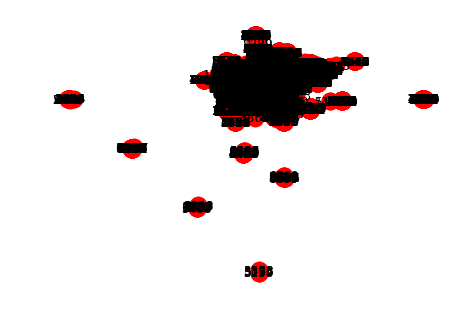

In [14]:
nx.draw(G1, with_labels=True)